# Task - Exploratory Data Analysis On Supestore Data

## Problem Statement

The goal of every supermarket is to make a profit. This is achieved when more goods are sold and the turnover is
high. A major challenge to increasing sales of a supermarket lies in the ability of the manager to forecast sales
patterns and know readily beforehand when to order and replenish inventories as well as plan for manpower and
staff. The amount of sales data has steadily been on the increase in recent years and the ability to leverage this gold
of data separates high-performing supermarkets from the others. One of the most valuable assets a supermarket
can have is data generated by customers as they interact with various supermarkets.

Within these data, lies important patterns and variables that can be used by superstores to plan business
strategies. Find out some interesting insights from the data provided to you and make a dashboard using any BI tool
(such as Tableau, Power BI, etc ). Make a summary report based on your analysis.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading Dataset
df = pd.read_excel('Superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,US,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
#Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [6]:
df = df.fillna(0)

In [7]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1236
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [8]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [9]:
df['Cost'] = df['Sales'] - df['Profit']
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2018-152156 2018-11-08 2018-11-11    Second Class    CG-12520   
1       2  CA-2018-152156 2018-11-08 2018-11-11    Second Class    CG-12520   
2       3  CA-2018-138688 2018-06-12 2018-06-16    Second Class    DV-13045   
3       4  US-2017-108966 2017-10-11 2017-10-18  Standard Class    SO-20335   
4       5  US-2017-108966 2017-10-11 2017-10-18  Standard Class    SO-20335   

     Customer Name    Segment Country             City  ... Region  \
0      Claire Gute   Consumer      US        Henderson  ...  South   
1      Claire Gute   Consumer      US        Henderson  ...  South   
2  Darrin Van Huff  Corporate      US      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer      US  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer      US  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   


In [10]:
#Statistical details
df[['Sales','Cost','Quantity','Discount','Profit']].describe()

,Sales,Cost,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,201.201105,3.789574,0.156203,28.656896
std,623.245101,550.839414,2.225110,0.206452,234.260108
min,0.444000,0.554400,1.000000,0.000000,-6599.978000
25%,17.280000,12.688200,2.000000,0.000000,1.728750
50%,54.490000,41.664000,3.000000,0.200000,8.666500
75%,209.940000,182.226300,5.000000,0.200000,29.364000
max,22638.480000,24449.558400,14.000000,0.800000,8399.976000


In [11]:
df[['Sales','Cost','Quantity','Discount','Profit']].corr()

,Sales,Cost,Quantity,Discount,Profit
Sales,1.000000,0.927710,0.200795,-0.028190,0.479064
Cost,0.927710,1.000000,0.199012,0.061448,0.116757
Quantity,0.200795,0.199012,1.000000,0.008623,0.066253
Discount,-0.028190,0.061448,0.008623,1.000000,-0.219487
Profit,0.479064,0.116757,0.066253,-0.219487,1.000000


<AxesSubplot:>

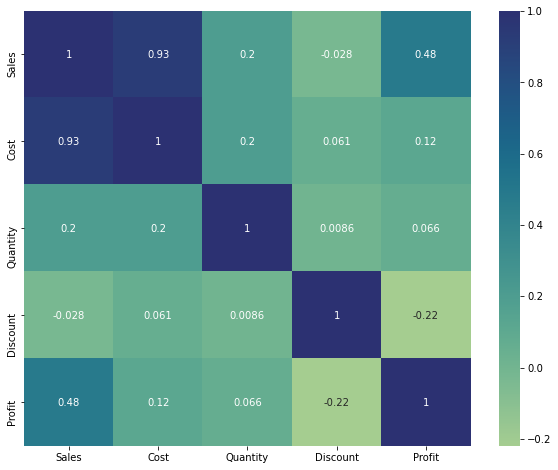

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Sales','Cost','Quantity','Discount','Profit']].corr(), cmap='crest', annot=True)

In [13]:
df[['Sales','Cost','Quantity','Discount','Profit']].cov()

,Sales,Cost,Quantity,Discount,Profit
Sales,388434.455308,318490.358722,278.459923,-3.627228,69944.096586
Cost,318490.358722,303424.060192,243.925154,6.987945,15066.298530
Quantity,278.459923,243.925154,4.951113,0.003961,34.534769
Discount,-3.627228,6.987945,0.003961,0.042622,-10.615173
Profit,69944.096586,15066.298530,34.534769,-10.615173,54877.798055


In [14]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2019-100111,Standard Class,WB-21850,William Brown,Consumer,US,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


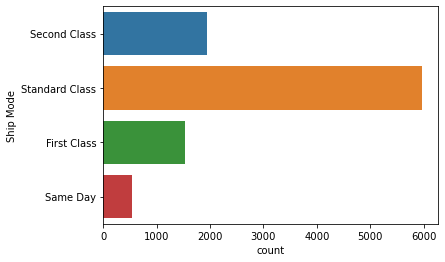

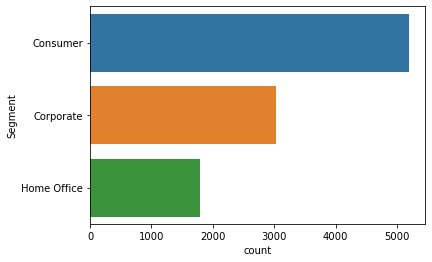

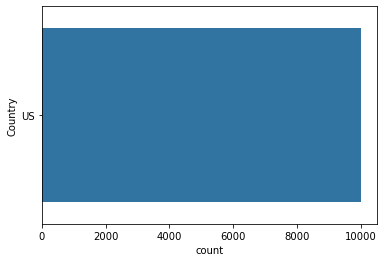

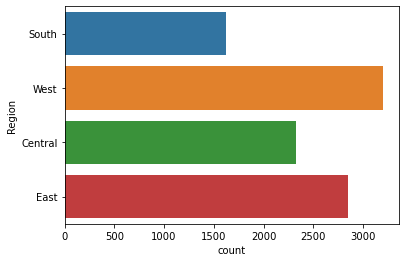

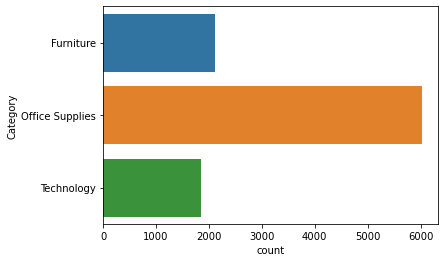

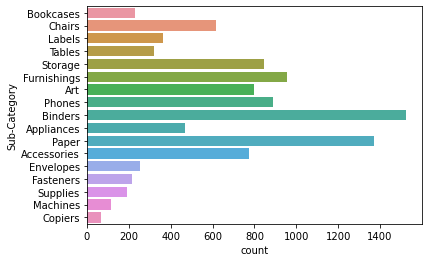

In [15]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 20:
        sns.countplot(y=column, data=df)
        plt.show()

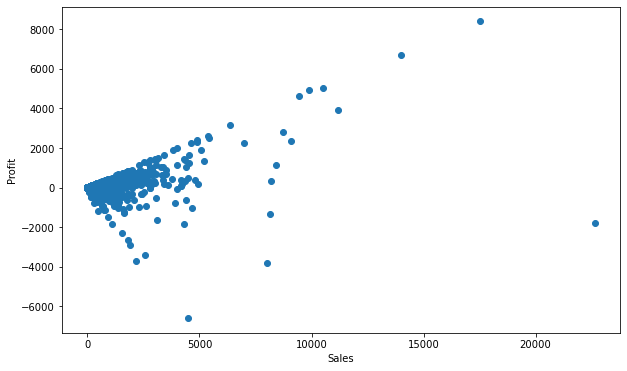

In [16]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

<ipython-input-17-d95077bb29bf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sale_profit_sum = df.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])


Text(0, 0.5, 'sales & profit count')

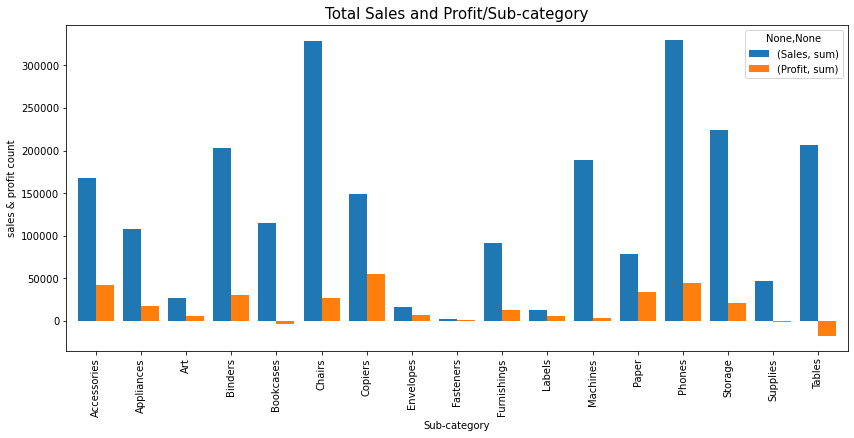

In [17]:
sale_profit_sum = df.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
sale_profit_sum.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit/Sub-category", fontsize=15)
plt.xlabel("Sub-category")
plt.ylabel("sales & profit count")

Text(0, 0.5, 'total sales')

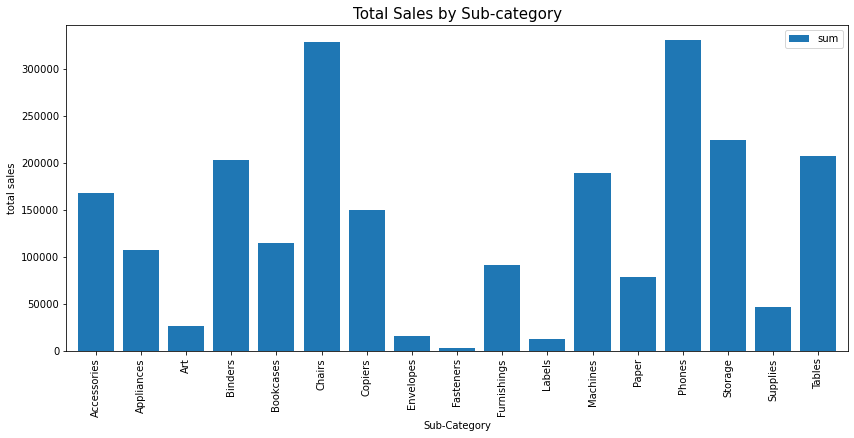

In [18]:
sub_cat_sales = df.groupby('Sub-Category')['Sales'].agg(['sum'])
sub_cat_sales.plot.bar(width=0.8,figsize=(14,6))
plt.title('Total Sales by Sub-category',fontsize = 15)
plt.ylabel('total sales')

<ipython-input-19-c9557d2217cd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sale_profit_sum = df.groupby('State')['Sales','Profit'].agg(['sum'])


Text(0, 0.5, 'sales & profit count')

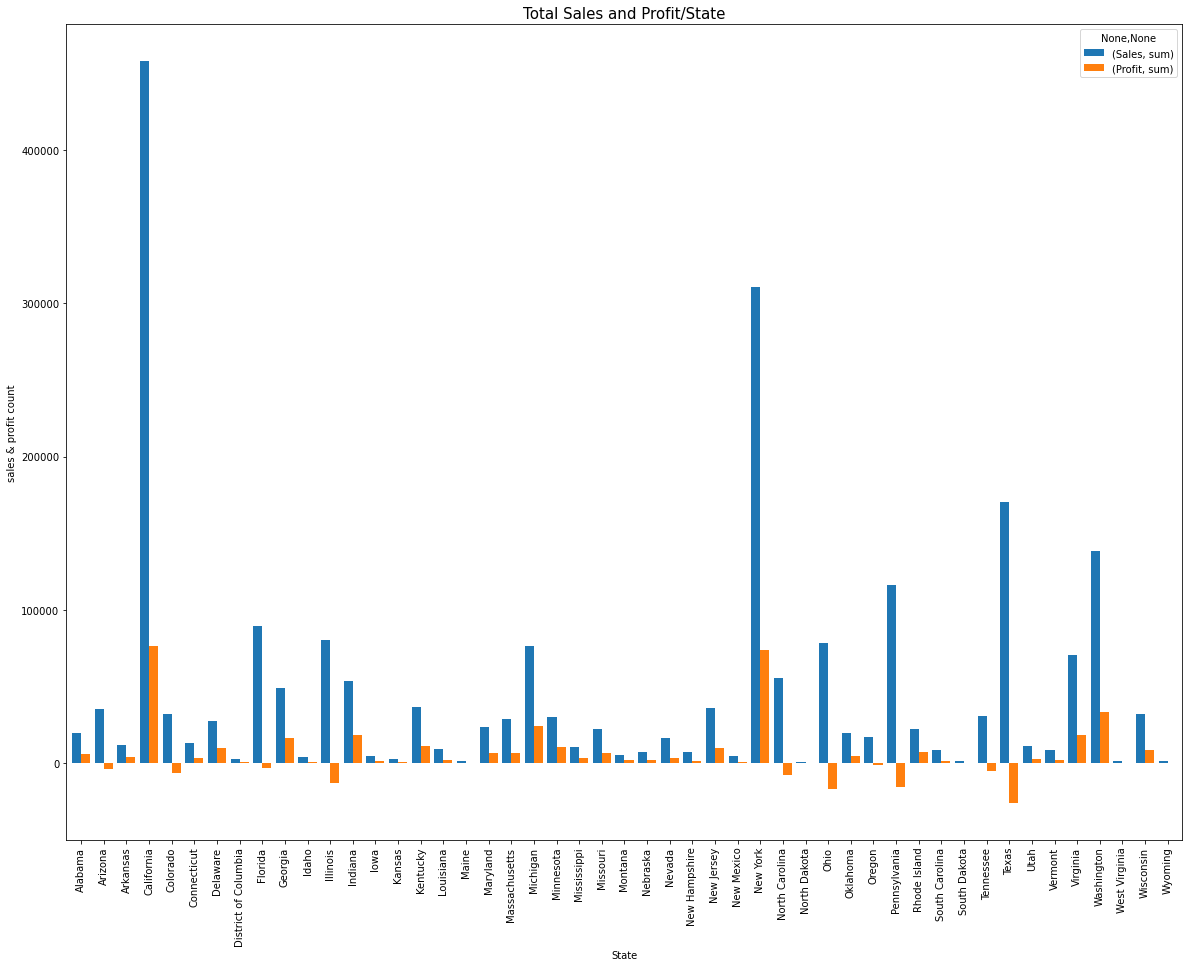

In [19]:
sale_profit_sum = df.groupby('State')['Sales','Profit'].agg(['sum'])
sale_profit_sum.plot.bar(width=0.8,figsize=(20,15))
plt.title("Total Sales and Profit/State", fontsize=15)
plt.xlabel("State")
plt.ylabel("sales & profit count")

In [20]:
category_group = df.groupby(['Category','Sub-Category'])['Sales','Cost','Quantity','Discount','Profit'].mean().reset_index()
segment_group = df.groupby(['Segment'])['Sales','Cost','Quantity','Discount','Profit'].mean().reset_index()
region_group = df.groupby(['Region'])['Sales','Cost','Quantity','Discount','Profit'].mean().reset_index()

<ipython-input-20-c59d203d9529>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_group = df.groupby(['Category','Sub-Category'])['Sales','Cost','Quantity','Discount','Profit'].mean().reset_index()
<ipython-input-20-c59d203d9529>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segment_group = df.groupby(['Segment'])['Sales','Cost','Quantity','Discount','Profit'].mean().reset_index()
<ipython-input-20-c59d203d9529>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_group = df.groupby(['Region'])['Sales','Cost','Quantity','Discount','Profit'].mean().reset_index()


In [21]:
category_group

,Category,Sub-Category,Sales,Cost,Quantity,Discount,Profit
0,Furniture,Bookcases,503.859633,519.090142,3.807018,0.211140,-15.230509
1,Furniture,Chairs,532.332420,489.236526,3.818476,0.170178,43.095894
2,Furniture,Furnishings,95.825668,82.179750,3.723093,0.138349,13.645918
3,Furniture,Tables,648.794771,704.360543,3.890282,0.261285,-55.565771
4,Office Supplies,Appliances,230.755710,191.832952,3.710300,0.166524,38.922758
5,Office Supplies,Art,34.068834,25.868097,3.768844,0.074874,8.200737
6,Office Supplies,Binders,133.560560,113.716986,3.922521,0.372292,19.843574
7,Office Supplies,Envelopes,64.867724,37.449706,3.566929,0.080315,27.418019
8,Office Supplies,Fasteners,13.936774,9.561114,4.211982,0.082028,4.375660
9,Office Supplies,Labels,34.303055,19.066093,3.846154,0.068681,15.236962


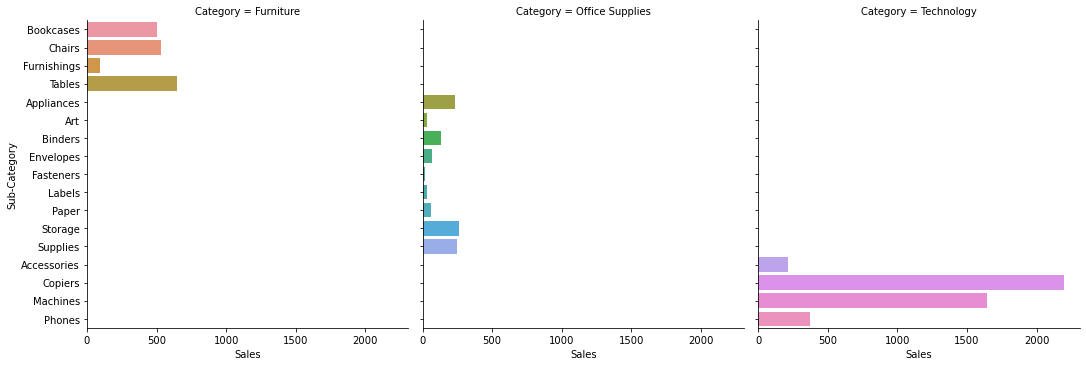

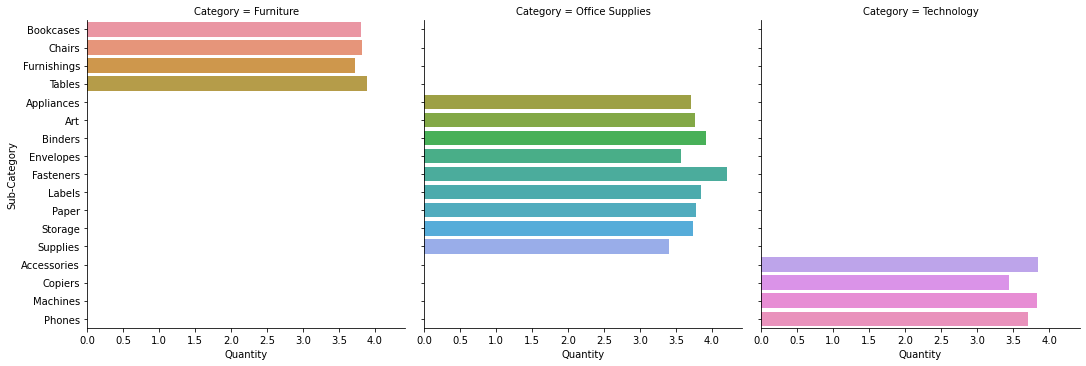

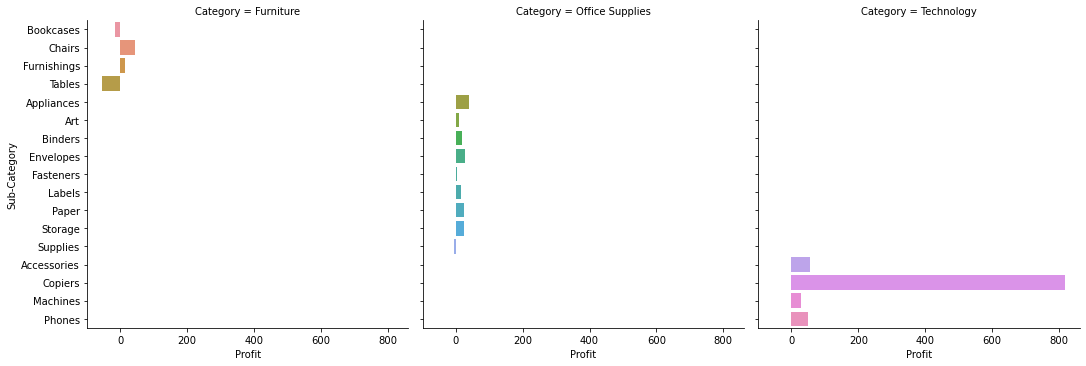

In [22]:
x = sns.catplot(x="Sales",y="Sub-Category",col="Category",data=category_group,kind='bar')
y = sns.catplot(x="Quantity",y="Sub-Category",col="Category",data=category_group,kind='bar')
z = sns.catplot(x="Profit",y="Sub-Category",col="Category",data=category_group,kind='bar')

In [23]:
segment_group

,Segment,Sales,Cost,Quantity,Discount,Profit
0,Consumer,223.733644,197.896771,3.760547,0.158141,25.836873
1,Corporate,233.823300,203.366633,3.843709,0.158228,30.456667
2,Home Office,240.972041,207.153376,3.782389,0.147128,33.818664


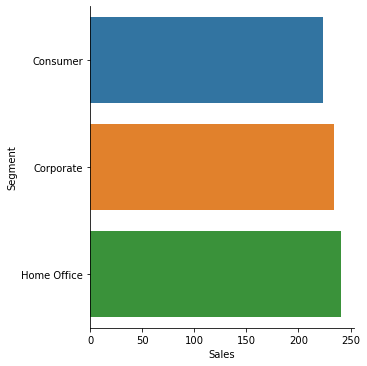

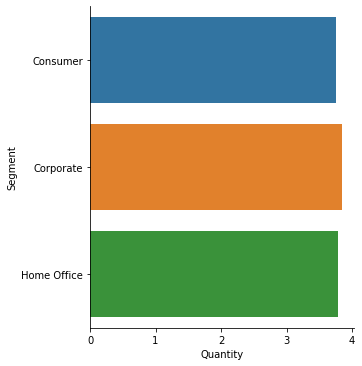

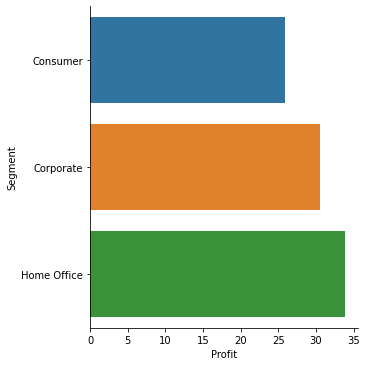

In [24]:
x = sns.catplot(x="Sales",y="Segment",data=segment_group,kind='bar')
y = sns.catplot(x="Quantity",y="Segment",data=segment_group,kind='bar')
z = sns.catplot(x="Profit",y="Segment",data=segment_group,kind='bar')

In [25]:
region_group

,Region,Sales,Cost,Quantity,Discount,Profit
0,Central,215.772661,198.679952,3.779595,0.240353,17.092709
1,East,238.336110,206.200302,3.728230,0.145365,32.135808
2,South,241.803645,212.945972,3.832716,0.147253,28.857673
3,West,226.493233,192.644201,3.829535,0.109335,33.849032


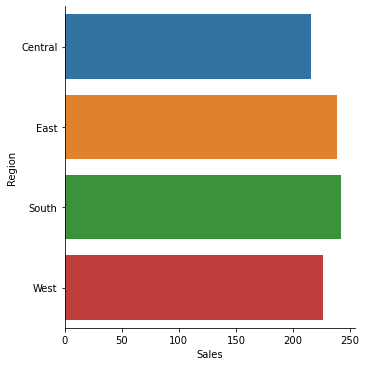

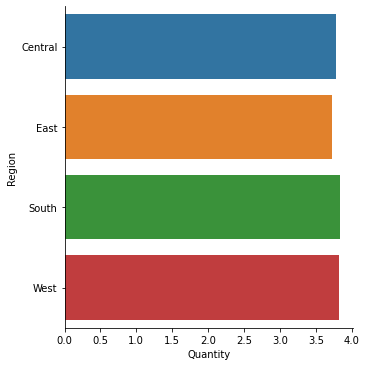

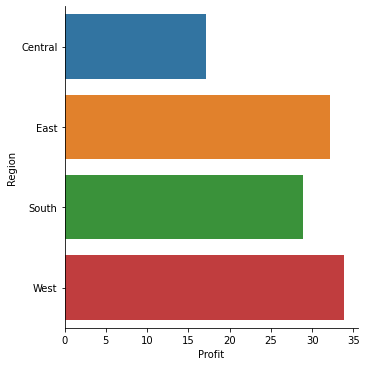

In [26]:
x = sns.catplot(x="Sales",y="Region",data=region_group,kind='bar')
y = sns.catplot(x="Quantity",y="Region",data=region_group,kind='bar')
z = sns.catplot(x="Profit",y="Region",data=region_group,kind='bar')

## Conclusion

1.Most of the Sales are in Southern and Eastern part of US.

2.Quantity of products sold in all the regions are almost same.

3.Profit higher in Western & Estern part of US.

4.Standard Class order more from superstor.

5.The Consumer segment are more preferable.

6.People from Western and eastern part of US order more from superstore.

7.Office supplies more than furniture and Technology

8.Highest profit is earned in Copiers and Selling price for Chairs and Phones is high.

9.Tables and Bookcases are in loss.

10.Most of the people buy phones and chair.

11.In technology category, Sales are more than other category.In technology category, Copiers and Machines are sold the most.

12.Quantity of products are almost sold in equal amount in each category.

13a.In Furniture category, Bookcases and Tables are in a loss.

 b.In Office Supplies category, there is a very minimum profit in all sub-categories.
 
 c.In technology category, Copiers provide the most profit.

14.All types of Segments have shown almost same number of sales & quantity sold.

15.Profit gained in the Home Office segment is higher and Consumer Segment being the lowest.

16.California and New York show high profit margin, while Texas and Ohio have suffered losses.

17.There is no significant correlation between more discount and profit.

In [27]:
df.to_excel('Superstore1.xlsx')